In [1]:
from pathlib import Path

data_dir = Path("../data")
image_dir = data_dir.joinpath("images")
label_file = data_dir.joinpath("responses.csv")

In [2]:
import csv

id_corr = {}
with open(label_file, "r") as fp:
    reader = csv.reader(fp)
    header = next(reader)

    for row in reader:
        id_corr[row[0]] = float(row[1])

print(len(id_corr))

150000


In [3]:
image_files = [image_file for image_file in image_dir.iterdir()]
print(len(image_files))

150000


## Test id matching in images/ and .csv

In [4]:
for image_id in list(id_corr.keys()):
    image_file = image_dir.joinpath(image_id + ".png")
    if not image_file.exists():
        print(f"{image_file} not exists")

## Test label distribution

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(values1, values2=None):
    sns.histplot(values1,
                 bins=50,
                 stat="density",
                 alpha=0.2,
                 kde=True,)
    if values2:
        sns.histplot(values2,
                     bins=50,
                     stat="density",
                     alpha=0.2,
                     kde=True,)
    plt.show()

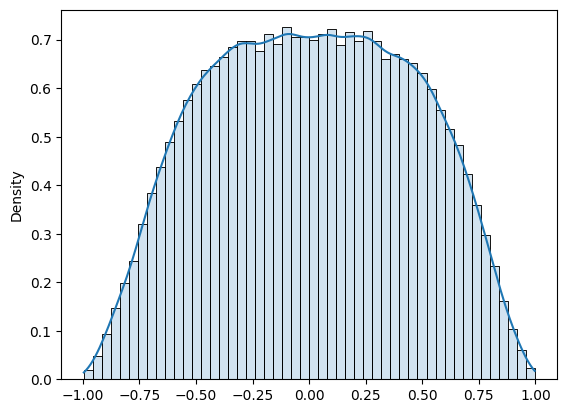

In [6]:
corrs = list(id_corr.values())
plot_distribution(corrs)

## Test if sampling leads to biased data

In [7]:
import random

def get_sample_indices(seed, n, ratio):
    random.seed(0)
    
    indices = random.sample(range(n), int(n * ratio))
    
    return indices

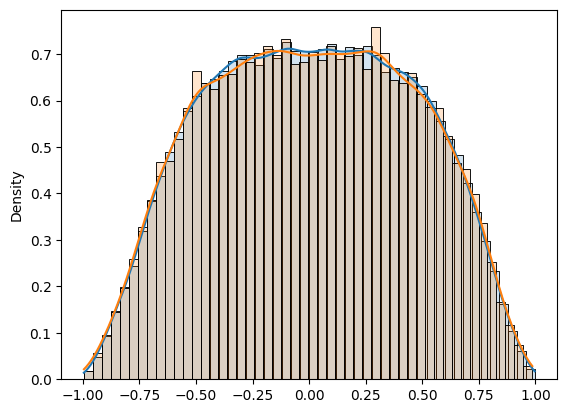

In [10]:
indices = get_sample_indices(0, len(corrs), 0.2)
plot_distribution(corrs, [corrs[i] for i in indices])

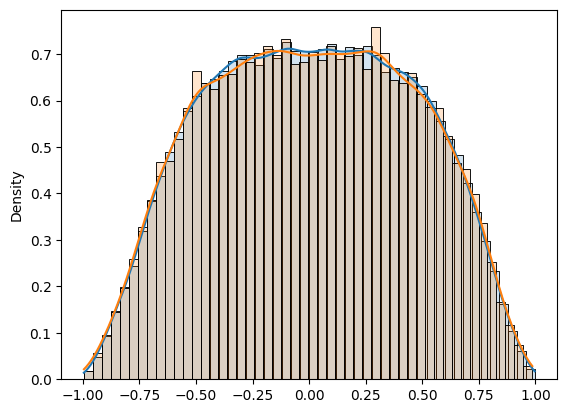

In [11]:
indices = get_sample_indices(2, len(corrs), 0.2)
plot_distribution(corrs, [corrs[i] for i in indices])

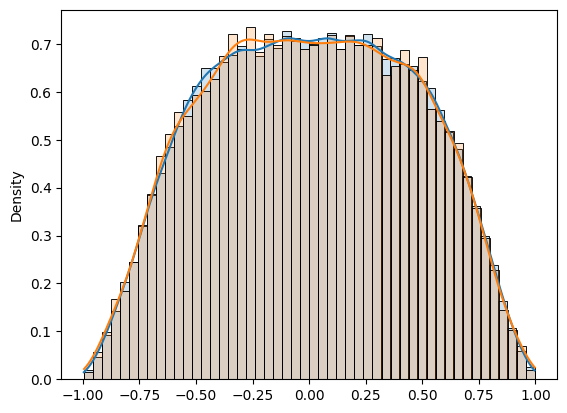

In [12]:
train = corrs[:int(len(corrs) * 0.8)]
test = corrs[int(len(corrs) * 0.8):]
plot_distribution(train, test)